In [243]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

### DATA
This dataset is for ABC Multistate bank with the following columns.The classification goal is to predict if the client will continue or retain with the bank.

1. **customer_id:** unused variable.

**Input variables:**

2. **credit_score:** used as input.
3. **country:** used as input.
4. **gender:** used as input.
5. **age:** used as input.
6. **tenure:** used as input.
7. **balance:** used as input.
8. **products_number:** used as input.
9. **credit_card:** used as input.
10. **active_member:** used as input.
11. **estimated_salary:** used as input.

**Output variable (desired target):**

12. **churn:**  target
1 if the client has left the bank during some period or 0 if he/she has not.


In [244]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [245]:
customersdf=pd.read_csv('/Users/apoorvakomatineni/Desktop/Data Analyst Prep/Projects/Project 5 -Customer Churn/Bank Customer Churn Prediction.csv')

### Intial Exploration

In [246]:
customersdf.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [247]:
customersdf.shape

(10000, 12)

In [248]:
customersdf.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [249]:
customersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [250]:
customersdf.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [251]:
customersdf['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [252]:
customersdf.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [253]:
customersdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [254]:
customersdf.corr()

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_3692/868045898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  customersdf.corr()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [255]:
#finding which columns are more correlated to Target column
customersdf.corr()['churn'].sort_values()

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_3692/1020491019.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  customersdf.corr()['churn'].sort_values()


active_member      -0.156128
products_number    -0.047820
credit_score       -0.027094
tenure             -0.014001
credit_card        -0.007138
customer_id        -0.006248
estimated_salary    0.012097
balance             0.118533
age                 0.285323
churn               1.000000
Name: churn, dtype: float64

### Exploratory Data Analysis

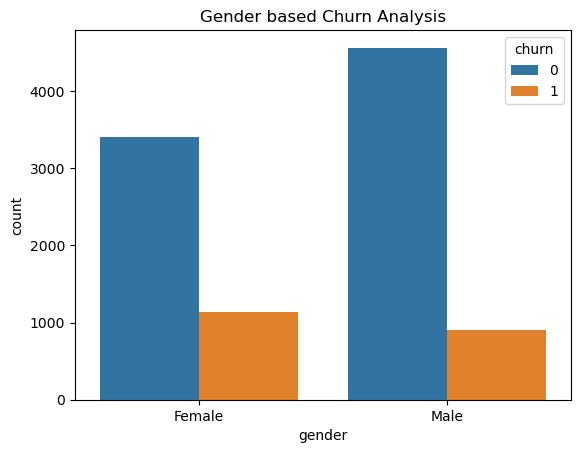

In [256]:
# Gender-based Churn Analysis
sns.countplot(data=customersdf,x='gender', hue='churn')
plt.title('Gender based Churn Analysis')
plt.show()

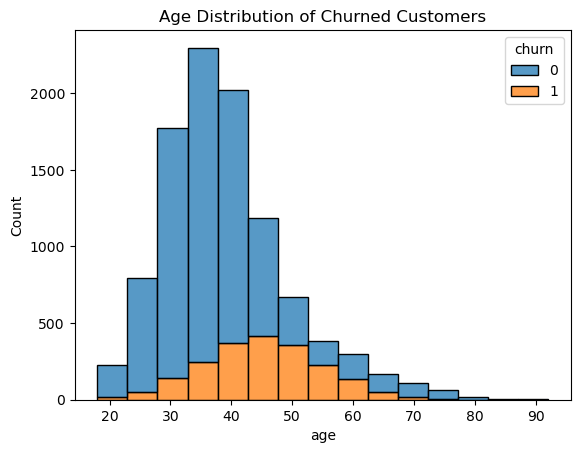

In [257]:
#Age Distribution of Churned Customers
sns.histplot(data=customersdf, x='age', hue='churn', multiple='stack', bins=15)
plt.title('Age Distribution of Churned Customers')
plt.show()

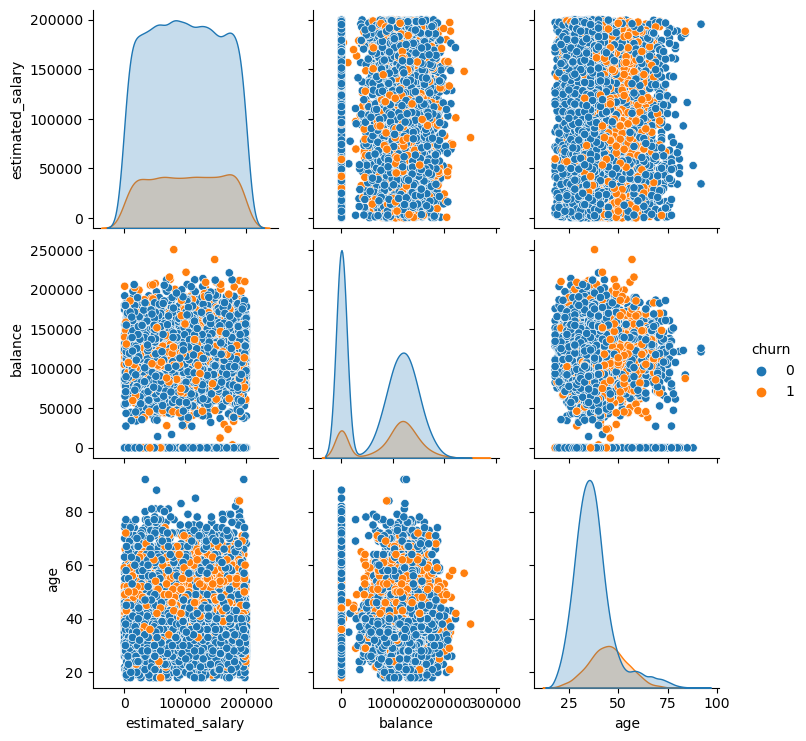

In [258]:
# Create pairplot
sns.pairplot(data=customersdf[['estimated_salary', 'balance', 'age', 'churn']], hue='churn')

<Axes: xlabel='country', ylabel='credit_score'>

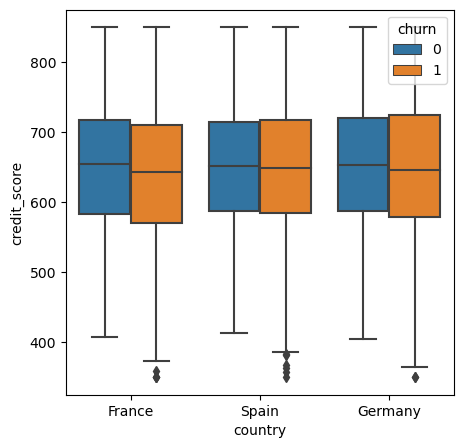

In [259]:
plt.figure(figsize=(5,5),dpi=100)
sns.boxplot(data=customersdf,x='country',y='credit_score',hue='churn')

<Axes: xlabel='age', ylabel='credit_score'>

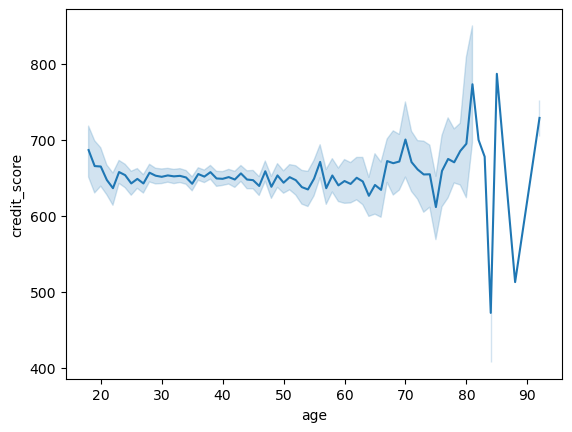

In [260]:
sns.lineplot(data=customersdf,x='age',y='credit_score') 

<Axes: xlabel='tenure', ylabel='balance'>

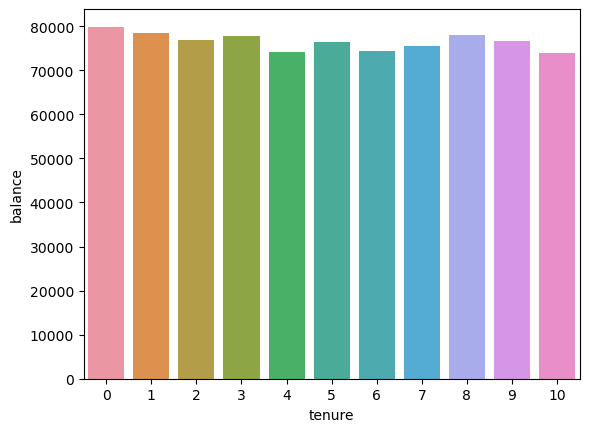

In [261]:
sns.barplot(data=customersdf, x='tenure', y='balance',dodge=False,errorbar=None)

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_3692/3667482321.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customersdf.corr(),cmap='viridis',annot=True)


<Axes: >

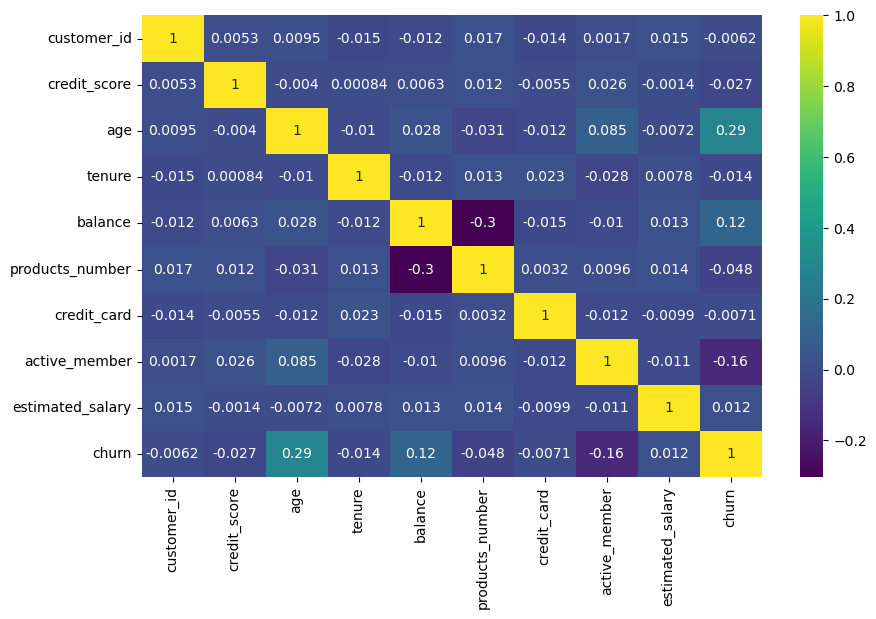

In [262]:
plt.figure(figsize=(10,6))
sns.heatmap(customersdf.corr(),cmap='viridis',annot=True)

### Encoding Categorical Variables

In [263]:
#creating a seperate df with object columns
customersdf_objs=customersdf.select_dtypes(include='object')

In [264]:
#creating dummies for that object columns
customersdf_objs= pd.get_dummies(customersdf_objs,drop_first=True)

In [265]:
customersdf_objs

,country_Germany,country_Spain,gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [266]:
#now dropping the original categorical columns from original df 
customersdf=customersdf.drop(['country','gender'],axis=1)

In [267]:
customersdf

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [268]:
#adding created dummies to original df
customersdf=pd.concat([customersdf,customersdf_objs],axis=1)

In [269]:
customersdf

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [270]:
#checking whether we have any categorical columns
customersdf.dtypes

customer_id           int64
credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_Germany       uint8
country_Spain         uint8
gender_Male           uint8
dtype: object

### Feature selection

The goal of feature selection is to improve the performance, interpretability, and efficiency of the machine learning model by identifying and retaining the most relevant features while discarding redundant or irrelevant ones.

In [271]:
customersdf=customersdf.drop(["credit_score","tenure","estimated_salary","credit_card"],axis=1)

In [272]:
customersdf

,customer_id,age,balance,products_number,active_member,churn,country_Germany,country_Spain,gender_Male
0,15634602,42,0.00,1,1,1,0,0,0
1,15647311,41,83807.86,1,1,0,0,1,0
2,15619304,42,159660.80,3,0,1,0,0,0
3,15701354,39,0.00,2,0,0,0,0,0
4,15737888,43,125510.82,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,15606229,39,0.00,2,0,0,0,0,1
9996,15569892,35,57369.61,1,1,0,0,0,1
9997,15584532,36,0.00,1,1,1,0,0,0
9998,15682355,42,75075.31,2,0,1,1,0,1


### Train Test Split

In [273]:
#Dividing the data into Features and Labels
X=customersdf.drop(['churn'],axis=1)
y=customersdf['churn']

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [275]:
print("X_train size :",X_train.shape)
print("y_train size :",y_train.shape)
print("X_test size :",X_test.shape)
print("y_test size :",y_test.shape)

X_train size : (9000, 8)
y_train size : (9000,)
X_test size : (1000, 8)
y_test size : (1000,)


In [276]:
scaler=StandardScaler()
scaler=scaler.fit(X_train)
scaledX_train=scaler.transform(X_train)
scaledX_test=scaler.transform(X_test)

# Logistic Regression Model

In [277]:
logisticmodel=LogisticRegression()

In [278]:
logisticmodel=logisticmodel.fit(scaledX_train,y_train)
logisticmodel

LogisticRegression()

In [279]:
y_pred1=logisticmodel.predict(scaledX_test)
y_pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [280]:
logisticmodel.coef_

array([[-0.02509283,  0.74693227,  0.1721213 , -0.05400265, -0.52124462,
         0.32451164,  0.0383584 , -0.26087295]])

In [281]:
print("Accuracy score of Logistic Regression :",accuracy_score(y_test,y_pred1))
print("Precision score of Logistic Regression :",precision_score(y_test,y_pred1))
print("Recall score of Logistic Regression :",recall_score(y_test,y_pred1))

Accuracy score of Logistic Regression : 0.811
Precision score of Logistic Regression : 0.6774193548387096
Recall score of Logistic Regression : 0.1990521327014218


In [282]:
#In percentage formats
print("Accuracy score of Logistic Regression: {:.2f}%".format(accuracy_score(y_test, y_pred1) * 100))
print("Precision score of Logistic Regression: {:.2f}%".format(precision_score(y_test, y_pred1) * 100))
print("Recall score of Logistic Regression: {:.2f}%".format(recall_score(y_test, y_pred1) * 100))


Accuracy score of Logistic Regression: 81.10%
Precision score of Logistic Regression: 67.74%
Recall score of Logistic Regression: 19.91%


In [283]:
confusion_matrix(y_test,y_pred1)

array([[769,  20],
       [169,  42]])

# Logistic Regression CV Model

In [284]:
#Training Again LOGISITICCV MODEL
cvmodel=LogisticRegressionCV()
cvmodel

LogisticRegressionCV()

In [285]:
cvmodel=cvmodel.fit(scaledX_train,y_train)

In [286]:
cv_ypred2=cvmodel.predict(scaledX_test)
cv_ypred2

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [287]:
#In percentage formats
print("Accuracy score of Logistic CV Model: {:.2f}%".format(accuracy_score(y_test, cv_ypred2) * 100))
print("Precision score of Logistic CV Model: {:.2f}%".format(precision_score(y_test, cv_ypred2) * 100))
print("Recall score of Logistic CV Model: {:.2f}%".format(recall_score(y_test, cv_ypred2) * 100))


Accuracy score of Logistic CV Model: 81.20%
Precision score of Logistic CV Model: 68.85%
Recall score of Logistic CV Model: 19.91%


In [288]:
cvmodel.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [289]:
confusion_matrix(y_test,cv_ypred2)

array([[770,  19],
       [169,  42]])

# Gaussian Naive Bayes

In [290]:
gaussianmodel=GaussianNB()

In [291]:
gaussianmodel=gaussianmodel.fit(scaledX_train,y_train)
gaussianmodel

GaussianNB()

In [292]:
gm_ypred3=gaussianmodel.predict(scaledX_test)
gm_ypred3

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [293]:
print("Accuracy score of Gaussian Model: {:.2f}%".format(accuracy_score(y_test, gm_ypred3) * 100))
print("Precision score of Gaussian Model: {:.2f}%".format(precision_score(y_test, gm_ypred3) * 100))
print("Recall score of Gaussian Model: {:.2f}%".format(recall_score(y_test, gm_ypred3) * 100))


Accuracy score of Gaussian Model: 83.80%
Precision score of Gaussian Model: 73.79%
Recall score of Gaussian Model: 36.02%


In [294]:
confusion_matrix(y_test,gm_ypred3)

array([[762,  27],
       [135,  76]])

# Random Forest Classifier

In [295]:
RfcModel=RandomForestClassifier(random_state=42)

In [296]:
RfcModel.fit(scaledX_train,y_train)
RfcModel

RandomForestClassifier(random_state=42)

In [297]:
Rfc_ypred4=RfcModel.predict(scaledX_test)
Rfc_ypred4

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [298]:
print("Accuracy score of RandomForestClassifier Model: {:.2f}%".format(accuracy_score(y_test, Rfc_ypred4) * 100))
print("Precision score of RandomForestClassifier Model: {:.2f}%".format(precision_score(y_test, Rfc_ypred4) * 100))
print("Recall score of RandomForestClassifier Model: {:.2f}%".format(recall_score(y_test, Rfc_ypred4) * 100))


Accuracy score of RandomForestClassifier Model: 85.50%
Precision score of RandomForestClassifier Model: 72.60%
Recall score of RandomForestClassifier Model: 50.24%


In [299]:
confusion_matrix(y_test,Rfc_ypred4)

array([[749,  40],
       [105, 106]])

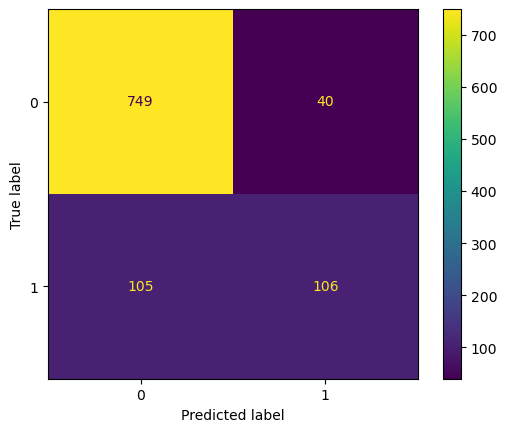

In [300]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,Rfc_ypred4)).plot()

In [301]:
print(classification_report(y_test,Rfc_ypred4))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       789
           1       0.73      0.50      0.59       211

    accuracy                           0.85      1000
   macro avg       0.80      0.73      0.75      1000
weighted avg       0.85      0.85      0.84      1000



### Performance Curves

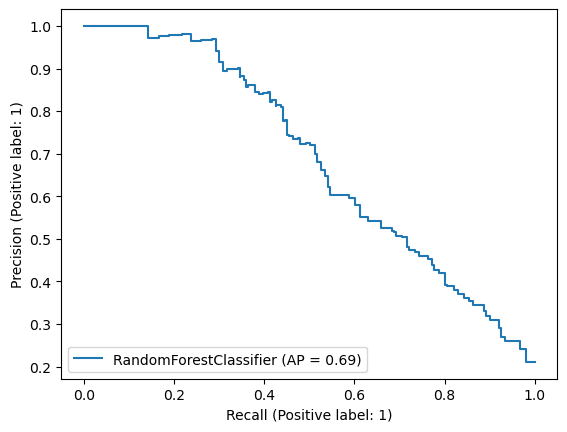

In [302]:
#precision_recall_curve(log_model,scaled_X_test,y_test)
PrecisionRecallDisplay.from_estimator(RfcModel, scaledX_test, y_test)

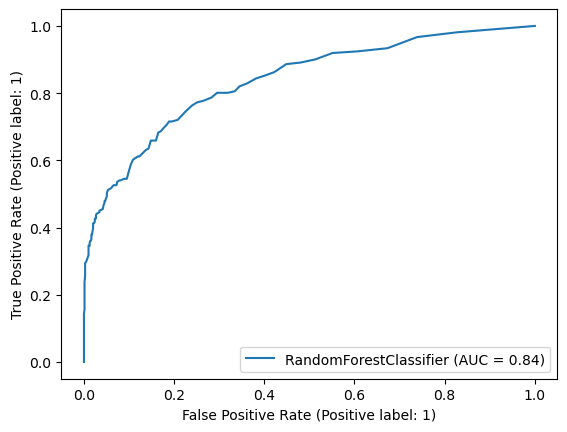

In [303]:
RocCurveDisplay.from_estimator(RfcModel,scaledX_test,y_test)